2
30
30
250
250
250
1750
1750
1750
1750


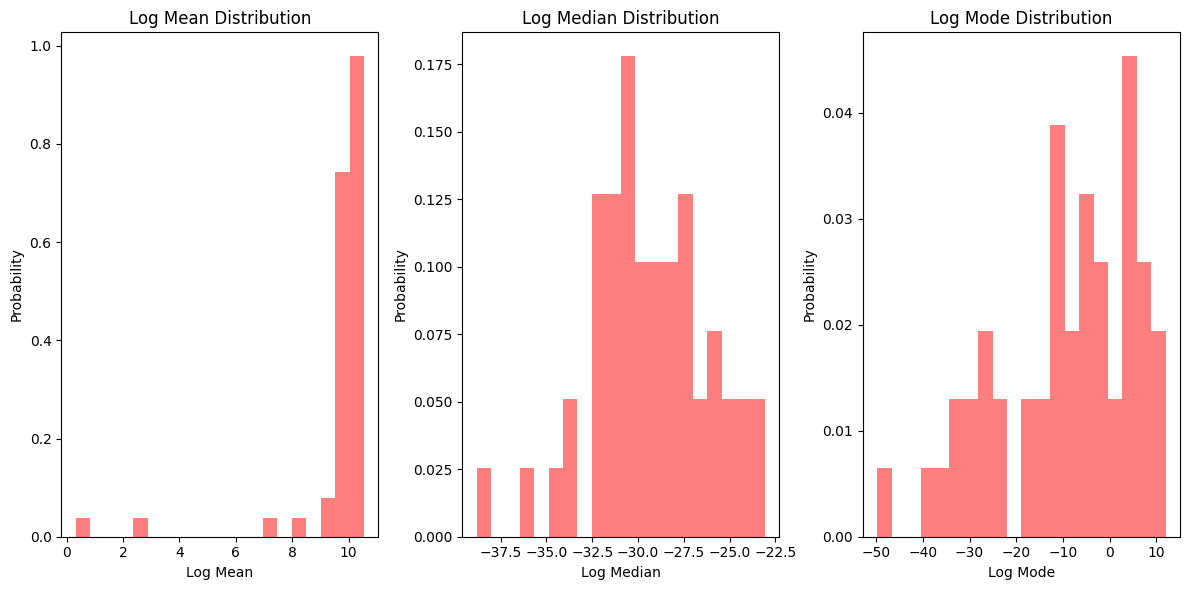

In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt

first = 2
ratio = 5
cd = 4
days = 50

agp = [(first + ((i-1)*cd))*(ratio**(i-1)) for i in range(1,200+1)for j in range(i)]

for i in range(10):
  print(agp[i])

means = []
medians = []
modes = []


for day in range(1, days + 1):

    num_samples = 10 * day
    samples = random.choices(agp, k=num_samples)


    mean = np.mean(samples)
    median = np.median(samples)
    mode = max(set(samples), key=samples.count)

    log_mean = math.log10(mean / 10**130)
    log_median = math.log10(median / 10**130)
    log_mode = math.log10(mode / 10**130)


    means.append(round(log_mean, 2))
    medians.append(round(log_median, 2))
    modes.append(round(log_mode, 2))



plt.figure(figsize=(12, 6))

plt.subplot(131)
plt.hist(means, bins=20, alpha=0.5, color='r', density=True)
plt.title("Log Mean Distribution")
plt.xlabel("Log Mean")
plt.ylabel("Probability")

plt.subplot(132)
plt.hist(medians, bins=20, alpha=0.5, color='r', density=True)
plt.title("Log Median Distribution")
plt.xlabel("Log Median")
plt.ylabel("Probability")

plt.subplot(133)
plt.hist(modes, bins=20, alpha=0.5, color='r', density=True)
plt.title("Log Mode Distribution")
plt.xlabel("Log Mode")
plt.ylabel("Probability")

plt.tight_layout()
plt.show()

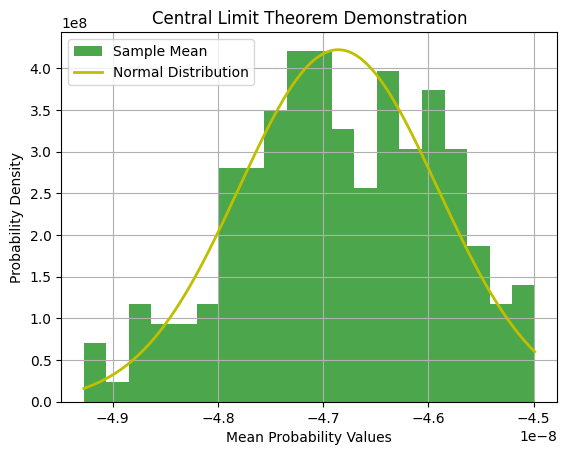

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm


def generate():
    x = np.random.uniform(-100, 0, 30)
    y = np.random.poisson(10, 70)
    z = np.random.exponential(scale=1/20, size=100 - 30)
    return np.concatenate((x, y, z))


num_runs = 200

num_samples = 100


mean_values = []
for _ in range(num_runs):
    sample_values = [generate() for _ in range(num_samples)]
    mean_values.append(np.mean(sample_values) / 1e8)

mean_mean = np.mean(mean_values)
std_dev = np.std(mean_values)

x = np.linspace(min(mean_values), max(mean_values), 1000)
y = norm.pdf(x, loc=mean_mean, scale=std_dev)


plt.hist(mean_values, bins=20, density=True, color='g', alpha=0.7, label='Sample Mean')
plt.plot(x, y, 'y', linewidth=2, label='Normal Distribution')
plt.xlabel('Mean Probability Values')
plt.ylabel('Probability Density')
plt.title('Central Limit Theorem Demonstration')
plt.legend()
plt.grid(True)

plt.show()